# Credit Card Fraud Detection

## Task 1:
## Exploratory Data Analysis of the Dataset

### Dataset & Attribute Information:

The dataset contains transactions made by credit cards in September 2013 by european cardholders. It contains only numerical input variables and due to confidentiality issues, it cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Finally there are two classes that each transaction falls into. A fradulent one represented 1 or non-fradulent one represented by 0.

### Importing the data and relevant libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings                       # In order to supress any warnings
warnings.filterwarnings('ignore')

In [2]:
cc = pd.read_csv('creditcard.csv') # Downloaded the dataset and saved it in the local directory.
cc['Class'] = cc['Class'].map({0:'Non_Fraudulent',1:'Fraudulent'}) # Changing the class value to a more easier notation.

In [3]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Non_Fraudulent
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Non_Fraudulent
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Non_Fraudulent
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Non_Fraudulent
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Non_Fraudulent


### Basic Analysis:

In [4]:
# Shape of the data
cc.shape

(284807, 31)

In [5]:
# The columns of the data
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# The number of datapoints belonging to each class
cc.Class.value_counts()

Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

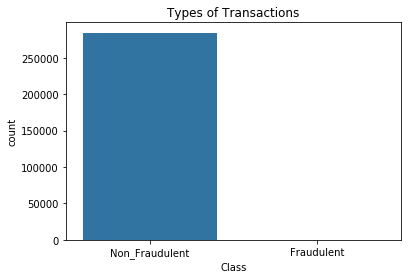

In [7]:
sns.countplot('Class',data = cc).set_title('Types of Transactions')
plt.show()

Clearly, this is a highly imbalanced dataset.

Here, the feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  
This doesn't say anything about the time taken by each transaction individually.
However, it can be calculated from the data.

In [8]:
times = [0] # Since the first transaction took place right away.

for i in range(1,len(cc)):
        times.append(cc.Time[i]-cc.Time[i-1])

times = np.array(times) # Since numpy arrays are more efficient than lists
print(times[:5])

[0. 0. 1. 0. 1.]


In [9]:
# The reason we are modifying the dataframe is to simplify the analysis process.
cc.insert(30,'Transaction_Time',times)

In [10]:
cc.columns # Updated Dataframe

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Transaction_Time', 'Class'],
      dtype='object')

In [11]:
# Basic information regarding the labeled features.
print(cc.Amount.describe())
print('\n')
print(cc.Time.describe())
print('\n')
print(cc.Transaction_Time.describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


count    284807.000000
mean          0.606699
std           1.053380
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          32.000000
Name: Transaction_Time, dtype: float64


In [12]:
# Now, let's create subsets of the DataFrame based on their class.
FT = cc[cc['Class'] == 'Fraudulent'] # FT = Fraudulent Transactions
NFT = cc[cc['Class'] == 'Non_Fraudulent'] # NFT = Non Fraudulent Transactions

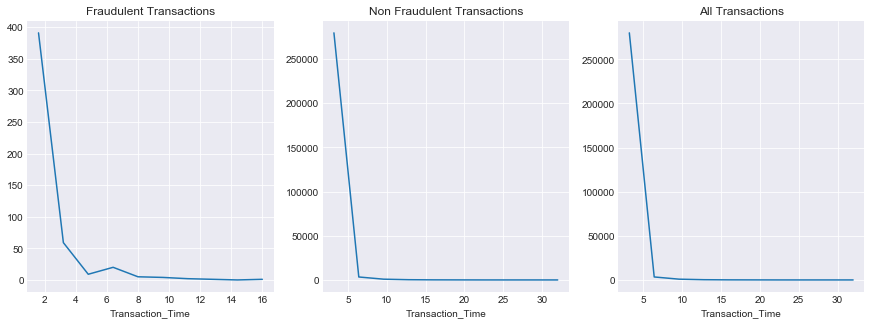

In [13]:
# Let us plot the PDFs for each labeled feature and compare them.
# Transaction Time
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))

plt.subplot(131)
counts, bin_edges = np.histogram(FT.Transaction_Time)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Transaction_Time')
plt.title('Fraudulent Transactions')

plt.subplot(132)
counts, bin_edges = np.histogram(NFT.Transaction_Time)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Transaction_Time')
plt.title('Non Fraudulent Transactions')

plt.subplot(133)
counts, bin_edges = np.histogram(cc.Transaction_Time)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Transaction_Time')
plt.title('All Transactions')

plt.show()

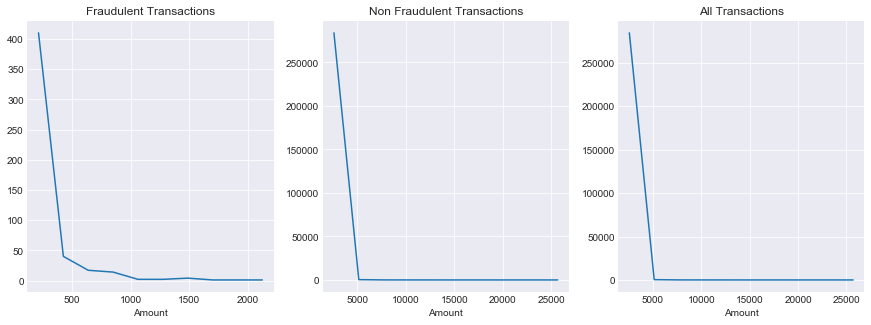

In [14]:
# Amount
plt.figure(figsize=(15,5))

plt.subplot(131)
counts, bin_edges = np.histogram(FT.Amount)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Amount')
plt.title('Fraudulent Transactions')

plt.subplot(132)
counts, bin_edges = np.histogram(NFT.Amount)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Amount')
plt.title('Non Fraudulent Transactions')

plt.subplot(133)
counts, bin_edges = np.histogram(cc.Amount)
plt.plot(bin_edges[1:],counts)
plt.xlabel('Amount')
plt.title('All Transactions')

plt.show()

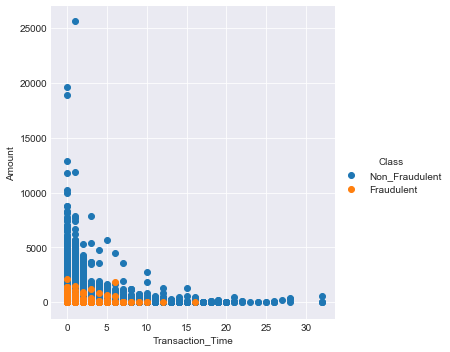

In [15]:
# Let's plot a scatter plot and see the relation between the Transaction Time, Time and Amount features.

p1 = sns.FacetGrid(cc,hue='Class',size = 5)
p1.map(plt.scatter, 'Transaction_Time', 'Amount')
p1.add_legend()
plt.show()

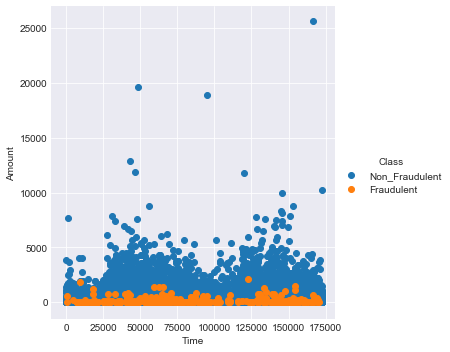

In [16]:
p2 = sns.FacetGrid(cc,hue='Class',size = 5)
p2.map(plt.scatter, 'Time', 'Amount')
p2.add_legend()
plt.show()

### Conclusions:  
*1. Out of all the transactions, 99.82% of them are Non Fraudulent Transactions.*<br/>
*2. Although the mean of the transaction time is 0.6, the median is 0, i.e. 50% of the transactions happen instantly.*<br/>
*3. The median amount transferred is 22, but the mean is roughly 88. This is because of quite a few outliers. *<br/>
*4. When looking at the Transaction Time histograms, we might think that very few Non Fraudulent Transactions are over 5-6 seconds, whereas quite a few Fraudulent ones are.*<br/>
*5. This however, is not true because the y axis in both those cases vary drastically, which might be misleading.*
*6. In reality, there are much more non fraudulent transactions that take over 6 seconds or so to execute when compared to the fraudulent ones.*<br/>
*7. Majority of the fraudulent transactions transfer amounts between 0-500, while most of the non-fraudulent transactions transfer amounts between 0-5000.*<br/>
*8. Looking at the Time vs Amount plot, we can say that in general, fraudulent transactions transfer low amounts of money.*<br/>
*9. But if we look at the Transaction Time vs Amount plot, we can notice that fraudulent transactions in general, not only transfer low amounts, but have low transaction times as well.*<br/>
*10. So the Transaction Time vs Amount plot does a better job at classifying the transactions into the two classes.*<br/>

## Task 2
## Finding Similarities

In [17]:
# Firstly, we need to read the data again since we added an additional column
# and the metric we are using here doesn't consider the additional column.

ccf =  pd.read_csv('creditcard.csv')
ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# Now let us define our metric
import math

def length(x):
    '''
    This function takes in a vector and returns the length of that vector.
    '''
    sum = 0
    for i in x:
        sum += i**2
    return math.sqrt(sum)

def similarity(x,y):
    '''
    This function computes the angle between the two vectors x and y in radians.
    '''
    dot_product = np.dot(x,y)
    product_of_lengths = length(x) * length(y)
    return math.acos((dot_product/product_of_lengths))

In [19]:
# We need a sample of the main dataset, which represents the
# distribution of classes in the main dataset. Since rougly 99%
# of the transactions are non fraudulent, we need 99 non fraudulent
# and 1 fraudulent transaction in our sample of 100 transactions.

nft = ccf[ccf['Class'] == 0].sample(99)
ft = ccf[ccf['Class'] == 1].sample(1)

In [20]:
sample = pd.concat([nft,ft])

sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244338,152310.0,2.117349,-0.147794,-1.619695,-0.019813,0.565325,-0.110829,0.038876,-0.089620,0.403485,...,-0.330166,-0.853093,0.161671,-1.391040,-0.151806,0.264016,-0.077373,-0.084539,0.89,0
206410,136199.0,-0.351773,0.845695,-0.089441,0.678521,0.857399,-0.985360,1.507309,-0.369851,-1.423575,...,0.388089,1.112765,-0.615545,0.176781,1.122251,1.009804,-0.027447,0.033375,57.00,0
203439,134817.0,1.611193,-1.364765,-0.421570,-0.488959,-1.045838,-0.015210,-0.582332,0.050158,1.704151,...,-0.101573,-0.361590,0.131426,-0.259810,-0.558074,0.380998,-0.049249,-0.024505,200.00,0
220018,141983.0,1.711077,-0.967045,-0.667354,-0.272593,-0.676820,-0.312633,-0.341915,-0.050622,0.743007,...,-0.155954,-0.706887,0.261101,-0.353874,-0.791367,0.837459,-0.115712,-0.037934,166.80,0
39053,39672.0,-0.439930,-0.295157,1.685874,-1.987982,-0.360950,0.395780,-0.438423,0.363248,-1.016557,...,0.551577,1.389035,-0.171258,-0.646066,-0.348633,-0.217254,0.151299,0.137391,34.99,0
74770,55747.0,-0.524995,-0.962507,0.509121,-2.825122,-0.717511,-0.817658,0.742923,-0.273124,-2.121742,...,0.017055,0.121163,0.283024,-0.157346,-0.136239,-0.479954,0.079854,0.177745,187.00,0
105038,69338.0,-4.274920,-1.297880,0.166557,3.594189,0.013444,0.342348,-1.319782,1.638366,-1.692479,...,0.085583,-0.463856,-0.875020,-0.205624,-0.847079,-0.048032,0.128267,-0.647531,114.10,0
25058,33501.0,-0.308106,-0.072117,2.588229,-1.173736,-1.006808,-0.019729,-0.310793,-0.066923,-0.794617,...,0.234112,0.908914,-0.172674,0.589722,-0.157326,-0.310882,-0.181319,-0.170343,9.99,0
66710,52181.0,1.389088,-1.730484,1.409175,-0.928413,-2.352872,0.435487,-2.004104,0.286962,-0.151339,...,-0.246615,-0.005054,-0.088740,-0.115062,0.387384,-0.012937,0.098174,0.030666,39.00,0
211826,138586.0,-2.986939,2.111087,-1.672516,-2.101711,-1.381548,-1.213100,-0.588836,1.827454,0.214092,...,0.341046,0.522656,0.080944,1.237921,0.007103,0.661396,-0.728052,-0.089682,39.00,0


In [21]:
# For every transaction in the sample we are finding out the top 10 
# transactions in the dataset which have the lowest similarity(i,j).
count = 0
for indexS,rowS in sample.iterrows():
    similarities = []
    d = {}
    for indexM,rowM in ccf.iterrows():
        if indexS == indexM:
            continue
        else:
            similarities.append(similarity(rowS.values,rowM.values))
            d[similarities[-1]] = indexM
    similarities.sort()
    print('Given Transaction ID is: ' + str(indexS) + '\n')
    print('Similar Transactions \n')
    for i in range(10):
        print('Class = ' + str(ccf.iloc[d[similarities[i]]].Class) + \
              ' Similarity = ' + str(similarities[i]) + ' Index = ' + \
              str(ccf.iloc[d[similarities[i]]].name))
    print('\n')
    
    # The computation required here is massive. Which is why we are limiting the
    # number of transactions in the sample set that were compared, to 5 transactions.
    # Simply removing the if condition below will run the entire sample dataset against
    # the entire main dataset.
    
    count += 1
    if count == 5:
        break

Given Transaction ID is: 244338

Similar Transactions 

Class = 0.0 Similarity = 1.0415901015580942e-06 Index = 255485
Class = 0.0 Similarity = 1.9235200159777223e-06 Index = 261889
Class = 0.0 Similarity = 2.7121750813619954e-06 Index = 282324
Class = 0.0 Similarity = 2.9795988721175364e-06 Index = 239495
Class = 0.0 Similarity = 3.1480620716596715e-06 Index = 273205
Class = 0.0 Similarity = 3.403406949004242e-06 Index = 242092
Class = 0.0 Similarity = 3.5486983202769385e-06 Index = 242711
Class = 0.0 Similarity = 3.6035247384518964e-06 Index = 255674
Class = 0.0 Similarity = 3.62432265922467e-06 Index = 267958
Class = 0.0 Similarity = 3.7440483375002686e-06 Index = 245972


Given Transaction ID is: 206410

Similar Transactions 

Class = 0.0 Similarity = 1.7319649847862104e-05 Index = 208670
Class = 0.0 Similarity = 2.5964767762797268e-05 Index = 253390
Class = 0.0 Similarity = 3.0759270599186364e-05 Index = 171091
Class = 0.0 Similarity = 3.0805187512166155e-05 Index = 212412
Class =